In [1]:
from rte import *
import math
import matplotlib.pyplot as plt
import os
os.environ["DDE_BACKEND"] = "pytorch"
import deepxde as dde
from time import time
import warnings
warnings.filterwarnings('ignore', message='.*rcond.*')
import csv
import numpy as np
import random
import argparse

# Set random seed
seed = 314
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
L = 1.0
dr = 0.01
dtheta = 2 * math.pi / 12
ep_index = -3
N = 51  # Number of particles
Ntrunc = 20
myRTE = RTESolver(L, dr, dtheta, ep_index, device)

# Fixed Test Distributions, 3 distributions so K=3.
GP = MaternGP(Ntrunc, dim=2, alpha=2, tau=1, sigma=1, device=device) # Define to get Ntrunc^2 eigenvalues of matern kernel
GP_mean = MaternGP(myRTE.Nr, dim=2, alpha=2, tau=1, device=device) # Define to sample an NrxNr matrix as mean

c = GP.sqrt_eig[None,:,:]*torch.randn(1,Ntrunc,Ntrunc,device=device)
GP_mean = GP_mean.sample(1)
loga = myRTE.c_to_loga(c) + GP_mean 

a = torch.exp(loga)
u = myRTE.compute_u(a)

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Computing Forward Solutions.


Processing samples: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.32s/it]


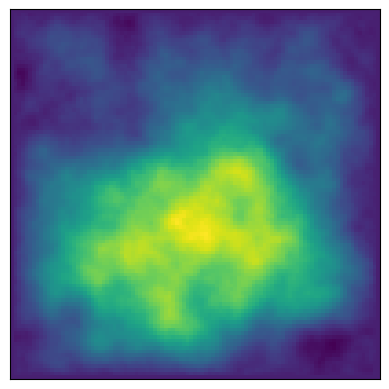

In [2]:
plt.imshow(a[0].cpu())
plt.xticks([])
plt.yticks([])
# plt.savefig('Images/scattering.png')

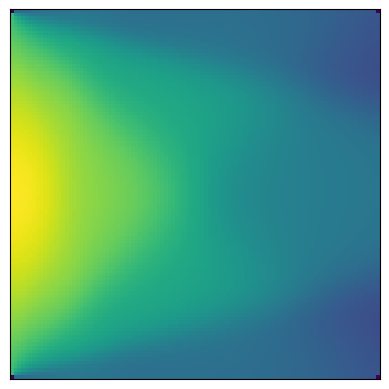

In [3]:
plt.imshow(u[0].cpu())
plt.xticks([])
plt.yticks([])
# plt.savefig(f'Images/OutputEpsilon{myRTE.epsilon}.png')